Python Project - Marvel Mart Project\
Reyn Okinaga\
March 7, 2023

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

proj = pd.read_csv("PLabProject/MM_Sales.csv")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# imports libraries needed for this lab as well as the csv file used in this project

# Part 1: Cleaning the Data

In [75]:
sumNA = proj.isna().sum()
print(sumNA, "\n")
# finds all missing values, but not incorrect values

print(proj.dtypes, "\n")

proj.groupby("Country")["Country"].agg("count")
# code that discovers 3 numbers that should be strings in the country column

Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64 

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID           object
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object 



Country
154.06            1
437.2             1
651.21            1
Afghanistan     260
Albania         286
               ... 
Vatican City    274
Vietnam         268
Yemen           238
Zambia          262
Zimbabwe        260
Name: Country, Length: 188, dtype: int64

In [76]:
proj.groupby("Item Type")["Item Type"].agg("count")
# code that discovers that there are 6 missing values in item type column

Item Type
Baby Food          4078
Beverages          4173
Cereal             4141
Clothes            4155
Cosmetics          4192
Fruits             4221
Household          4138
Meat               4221
Office Supplies    4138
Personal Care      4185
Snacks             4163
Vegetables         4189
Name: Item Type, dtype: int64

In [77]:
proj.groupby("Order Priority")["Order Priority"].agg("count")
# discovers that there are 15 missing values in the order priority column

Order Priority
C     5013
H    15099
L     9986
M    19887
Name: Order Priority, dtype: int64

In [78]:
proj.groupby("Order ID")["Order ID"].agg("count")
# discovers that there are 5 incorrect strings that should be numbers

Order ID
100013196    1
100023066    1
100061261    1
100071990    1
100074136    1
            ..
999999463    1
Cosmetics    1
Fruits       1
Meat         1
Snacks       2
Name: Order ID, Length: 49999, dtype: int64

In [79]:
projClean = proj.copy()

In [80]:
projClean.to_csv("PLabProject/MM_Sales_Clean.csv")

In [81]:
projCleaned = pd.read_csv("PLabProject/MM_Sales_Clean.csv")

The three code lines above this creates a copy of the data file to create a clean copy that we are going to now edit in the correct data.

In [82]:
print("\nTesting erronous data in Country")
count = 0 
for index, row in projCleaned.iterrows():
    try:
        row.loc["Country"] = float(row.loc["Country"])
        print(projCleaned.loc[int(index), "Country"])
        projCleaned.loc[int(index), "Country"] = "NULL"
        count+=1
    except:
        count+=0
        
print(f"Number of errors in Country {count}")
# converts all rows into float, if it converts it is bad and is turned into a "NULL" value


Testing erronous data in Country
154.06
437.2
651.21
Number of errors in Country 3


In [83]:
projCleaned.groupby("Country")["Country"].agg("count")

Country
Afghanistan     260
Albania         286
Algeria         283
Andorra         277
Angola          290
               ... 
Vatican City    274
Vietnam         268
Yemen           238
Zambia          262
Zimbabwe        260
Name: Country, Length: 186, dtype: int64

The two codes above this pertain to the country column. The first code corrects the incorrect data and replaces it with "NULL" and the second code shows that we have fixed the data.

In [84]:
projCleaned["Item Type"].fillna("NULL", inplace = True)
# fills all missing values of Item Type to NULL

In [85]:
projCleaned.groupby("Item Type")["Item Type"].agg("count")

Item Type
Baby Food          4078
Beverages          4173
Cereal             4141
Clothes            4155
Cosmetics          4192
Fruits             4221
Household          4138
Meat               4221
NULL                  6
Office Supplies    4138
Personal Care      4185
Snacks             4163
Vegetables         4189
Name: Item Type, dtype: int64

The two codes above pertain to the Item Type column. The first code fills all the missing values to "NULL" and the second code shows that we have corrected the data.

In [86]:
projCleaned["Order Priority"].fillna("NULL", inplace = True)
# fills all missing values of Item Type to NULL

In [87]:
projCleaned.groupby("Order Priority")["Order Priority"].agg("count")

Order Priority
C        5013
H       15099
L        9986
M       19887
NULL       15
Name: Order Priority, dtype: int64

The two codes above pertain to the Order Priority column. The first code fills the missing values to "NULL" and the second code shows that we have corrected the data.

In [88]:
count = 0 

print("\nTesting erronous data in Order ID")

for index, row in projCleaned.iterrows():
    try:
        row.loc["Order ID"] = float(row.loc["Order ID"])
        row.loc["Order ID"] < 0 # finds strings
    except:
        print(row.loc["Order ID"])
        projCleaned.loc[index, "Order ID"] = 0.0
        count+=1
print(f"Number of errors in Order ID {count}")
# converts all rows into floats, if it cannot, then it is bad and converts strings into 0.0.


Testing erronous data in Order ID
Cosmetics
Fruits
Snacks
Meat
Snacks
Number of errors in Order ID 5


In [89]:
projCleaned.groupby("Order ID")["Order ID"].agg("count")

Order ID
0.0          5
100013196    1
100023066    1
100061261    1
100071990    1
            ..
999941527    1
999944102    1
999951398    1
999998605    1
999999463    1
Name: Order ID, Length: 49996, dtype: int64

The two codes above pertain to the Order ID column. The first code corrects the incorrect data by replacing it with 0.0 and the second code shows that we have fixed the data.

In [90]:
projCleaned = projCleaned[projCleaned["Country"] != "NULL"]
projCleaned = projCleaned[projCleaned["Item Type"] != "NULL"]
projCleaned = projCleaned[projCleaned["Order Priority"] != "NULL"]
projCleaned = projCleaned[projCleaned["Order ID"] != 0.0]

This code removes all the rows that we have altered as a result of incorrect information.

# Part 2:  Exploratory Data Analysis with Reports & Visualizations

Country
Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: Country, dtype: int64


Text(0, 0.5, 'Country')

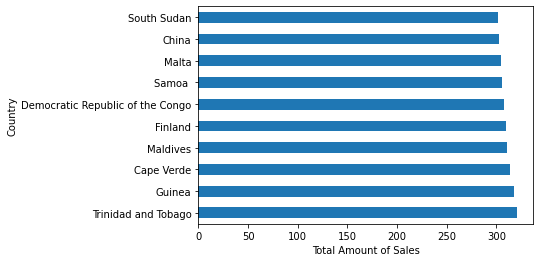

In [91]:
#2.2.1 - gathers the top ten countries we have the most sales in by grouping the columns together and counting the rows
top_10 = projCleaned.groupby(["Country"])["Country"].count().nlargest(10)
print(top_10)
top_10.plot(kind="barh")
plt.xlabel("Total Amount of Sales")
plt.ylabel("Country")

In [92]:
# 2.1.2 - writes to csv file of the information above with a created dictionary to input values in the writer
series = top_10.head(10)
series.to_dict()

with open("PLabProject/MM_Rankings.txt", "w+") as writer:
    writer.write("Countries Most Sale Transactions:")

with open("PLabProject/MM_Rankings.txt", "a+") as writer:
    for k, v in series.items():
        writer.write(f"\n{k}: {v}")
    
    writer.write("\nThe country we should build our shopping center is Cape Verde because it has the most amount of sales, but does not have a shipping center.") 
    writer.write(" Cape Verde has the third most sales, however the the top two countries with the most sales already have a shipping center.\n")

In [93]:
#2.2.1 - gains data of the amount of online and offline sales
projCleaned.groupby("Sales Channel")["Sales Channel"].agg("count")

Sales Channel
Offline    19788
Online     30183
Name: Sales Channel, dtype: int64

In [94]:
#2.2.2 - gains data of the order priority types
projCleaned.groupby("Order Priority")["Order Priority"].agg("count")

Order Priority
C     5012
H    15094
L     9984
M    19881
Name: Order Priority, dtype: int64

Sales Channel
Offline    19788
Online     30183
Name: Sales Channel, dtype: int64


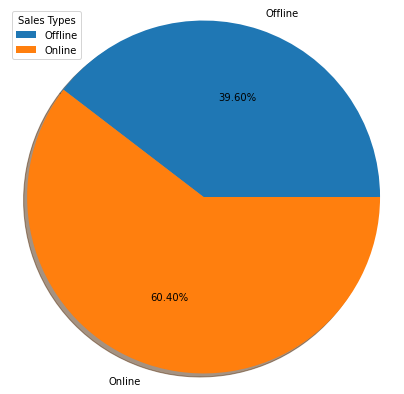

In [95]:
#2.2.3 - pie chart 1
salesType = projCleaned.groupby(["Sales Channel"]).mean()
salesTypeS = projCleaned.groupby(["Sales Channel"])["Sales Channel"].count()

print(salesTypeS)

plt.figure(figsize=(7,7))
plt.pie(salesTypeS, labels=salesTypeS.index, shadow = True, autopct='%1.2f%%')
plt.axis('equal')
plt.legend(loc=2, title="Sales Types")
plt.show()

Order Priority
C     5012
H    15094
L     9984
M    19881
Name: Order Priority, dtype: int64


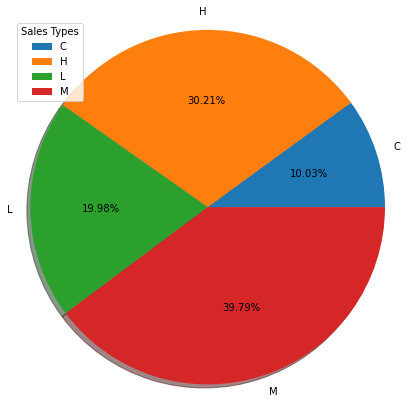

In [96]:
#2.2.3 - pie chart 2
orderTypeS = projCleaned.groupby(["Order Priority"])["Order Priority"].count()

print(orderTypeS)

plt.figure(figsize=(7,7))
plt.pie(orderTypeS, labels=orderTypeS.index, shadow = True, autopct='%1.2f%%')
plt.axis('equal')
plt.legend(loc=2, title="Sales Types")
plt.show()

In [97]:
#2.2.4 - appends to csv file of the information above with a created dictionary to input values in the writer
series1 = salesTypeS.head()
series1.to_dict()
series2 = orderTypeS.head(4)
series2.to_dict()

with open("PLabProject/MM_Rankings.txt", "a+") as writer:
    writer.write("\nSales Channels:")
    
    for k, v in series1.items():
        writer.write(f"\n{k}: {v}")
    
    writer.write("\nWe do more online sales.\n")
    writer.write("\nOrder Priorities:")
    
    for k, v in series2.items():
        writer.write(f"\n{k}: {v}")
    
    writer.write("\nWe do more M order priorities.\n")


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


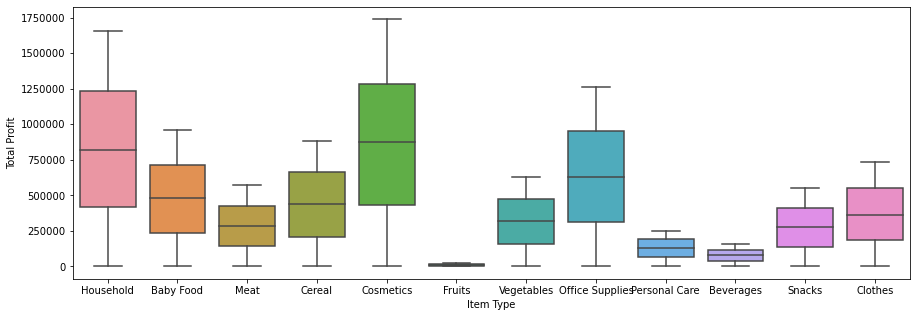

In [98]:
#2.3.1 - boxplot of item type and total profit
plt.figure(figsize=(15,5))
ay = sns.boxplot(projCleaned["Item Type"], projCleaned["Total Profit"])
plt.ticklabel_format(style="plain", axis="y")

In [99]:
#2.3.2 - gathers information of sum of the total profit by item type
projCleaned.groupby("Item Type")["Total Profit"].agg("sum")

Item Type
Baby Food         1942865748.120
Beverages          327559249.080
Cereal            1824726412.290
Clothes           1520832019.680
Cosmetics         3638407966.750
Fruits              51010570.920
Household         3401180998.060
Meat              1196342404.400
Office Supplies   2605440187.500
Personal Care      535250525.600
Snacks            1149715758.720
Vegetables        1322639660.240
Name: Total Profit, dtype: float64

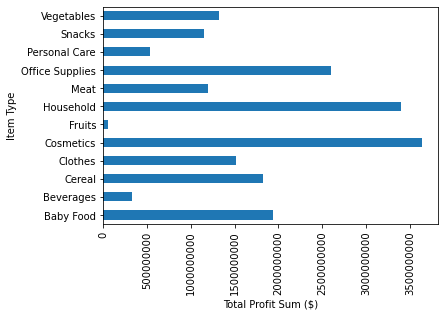

In [100]:
#2.3.3 - creates a bar graph of the information above 
o = projCleaned.groupby("Item Type")["Total Profit"].agg("sum")
o.plot(kind="barh")
plt.xlabel("Total Profit Sum ($)")
plt.ylabel("Item Type")
plt.xticks(rotation=90)
plt.ticklabel_format(style="plain", axis="x")
plt.show()

In [101]:
#2.3.4 - gathers the top 3 item types that have made the most profit
top_3 = projCleaned.groupby("Item Type")["Total Profit"].agg("sum").nlargest(3)

In [102]:
#2.3.5 - appends to csv file of the information above with a created dictionary to input values in the writer
series3 = top_3.head(3)
series3.to_dict()

with open("PLabProject/MM_Rankings.txt", "a+") as writer:
    writer.write("\nHighest Selling Items:")
    for k, v in series3.items():
        writer.write(f"\n{k}: {v}")
    
    writer.write("\nWe profited from Cosmetics the most.\n")

2.3.6\
The results are expected as the box plots distributions show the maximum and correlate well to the top values of the sum of the total profits. The top three values of the box plot correlate to the top three values in the bar graph. The box plot shows the ranges of values of the total profits related to the item type. The only thing unexpected is the NULL result as in the box plot, it shows that there is a max value close to the third top value, yet the NULL value in the bar chart doesn't show the bar for the sum of the total profits. 

In [103]:
#2.4.1 - gets the sum of the units sold, unit cost, total revenue, total cost, and total profit and makes a dicitionary for the writer
# for later as well as a dictionary for the graph later
USsum = projCleaned["Units Sold"].sum()
UCsum = projCleaned["Unit Cost"].sum()
TRsum = projCleaned["Total Revenue"].sum()
TCsum = projCleaned["Total Cost"].sum()
TPsum = projCleaned["Total Profit"].sum()

sumD =  {"Units Sold": USsum, "Unit Cost": UCsum, "Total Revenue": TRsum, "Total Cost": TCsum, "Total Profit": TPsum}
sumDgraph = {"Total Revenue": TRsum, "Total Cost": TCsum, "Total Profit": TPsum}

In [104]:
#2.4.2 - gets the mean of the units sold, unit cost, total revenue, total cost, and total profit and makes a dicitionary for the writer
# for later as well as a dictionary for the graph later
USmean = projCleaned["Units Sold"].mean()
UCmean = projCleaned["Unit Cost"].mean()
TRmean = projCleaned["Total Revenue"].mean()
TCmean = projCleaned["Total Cost"].mean()
TPmean = projCleaned["Total Profit"].mean()

meanD =  {"Units Sold": USmean, "Unit Cost": UCmean, "Total Revenue": TRmean, "Total Cost": TCmean, "Total Profit": TPmean}
meanDgraph =  {"Total Revenue": TRmean, "Total Cost": TCmean, "Total Profit": TPmean}

In [105]:
#2.4.3 - gets the maximum of the units sold, unit cost, total revenue, total cost, and total profit and makes a dicitionary for the writer
# for later as well as a dictionary for the graph later
USmax = projCleaned["Units Sold"].max()
UCmax = projCleaned["Unit Cost"].max()
TRmax = projCleaned["Total Revenue"].max()
TCmax = projCleaned["Total Cost"].max()
TPmax = projCleaned["Total Profit"].max()

maxD =  {"Units Sold": USmax, "Unit Cost": UCmax, "Total Revenue": TRmax, "Total Cost": TCmax, "Total Profit": TPmax}
maxDgraph =  {"Total Revenue": TRmax, "Total Cost": TCmax, "Total Profit": TPmax}

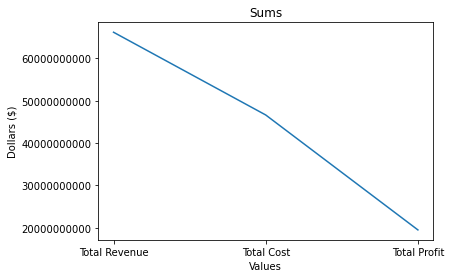

In [106]:
#2.4.4 - creates a line plot of the sum values of the total revenue, total cost, and total profit
plt.plot(list(sumDgraph.keys()), list(sumDgraph.values()))
plt.title("Sums")
plt.xlabel("Values")
plt.ylabel("Dollars ($)")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

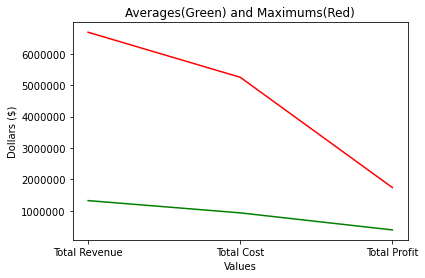

In [107]:
#2.4.4 - creates a line plot of the average and max values of the total revenue, total cost, and total profit
# the red line shows the max values and the green line shows the average values.
plt.plot(list(meanDgraph.keys()), list(meanDgraph.values()), "-g")
plt.title("Averages(Green) and Maximums(Red)")
plt.plot(list(maxDgraph.keys()), list(maxDgraph.values()), "-r")
plt.xlabel("Values")
plt.ylabel("Dollars ($)")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

In [108]:
#2.4.5 - appends to csv file of the information above with the previously created dictionary to input values in the writer with two
# decimal places
with open("PLabProject/MM_Calc.txt", "a+") as writer:
    writer.write("\nSums:")
    for k, v in sumD.items():
        writer.write(f"\n{k}: {v:.2f}")
    
    writer.write("\n\nAverages:")
    for k, v in meanD.items():
        writer.write(f"\n{k}: {v:.2f}")
    
    writer.write("\n\nMaximums:")
    for k, v in maxD.items():
        writer.write(f"\n{k}: {v:.2f}")

# Part 3: Cross-Reference Statistics

In [109]:
#3.1.1 - creates a list of the regions and countries with no duplicates and then puts the lists into the dictionary with region being the key and countries list being the values.

Region_Countries = list(set(projCleaned["Region"]))
Country_in_Regions = {}

# gets unique countries in each region with the for loop
for x in Region_Countries: 
    country = projCleaned.loc[projCleaned["Region"] == x, "Country"]
    country = list(set(country))
    Country_in_Regions[x] = country
    
print(Country_in_Regions)

{'Central America and the Caribbean': ['Panama', 'Guatemala', 'Jamaica', 'Costa Rica', 'Nicaragua', 'Saint Vincent and the Grenadines', 'Barbados', 'Cuba', 'El Salvador', 'Saint Kitts and Nevis ', 'Dominican Republic', 'Trinidad and Tobago', 'Grenada', 'Belize', 'Antigua and Barbuda ', 'Saint Lucia', 'Honduras', 'Haiti', 'The Bahamas', 'Dominica'], 'Sub-Saharan Africa': ['Mali', "Cote d'Ivoire", 'Chad', 'Senegal', 'Comoros', 'Ethiopia', 'Democratic Republic of the Congo', 'The Gambia', 'Madagascar', 'Ghana', 'Gabon', 'Uganda', 'Sudan', 'Kenya', 'Guinea', 'Burkina Faso', 'Togo', 'Benin', 'Mauritania', 'Guinea-Bissau', 'Namibia', 'Mozambique', 'Zimbabwe', 'Equatorial Guinea', 'Tanzania', 'Liberia', 'Cameroon', 'Malawi', 'South Africa', 'Niger', 'Djibouti', 'Angola', 'Zambia', 'South Sudan', 'Sao Tome and Principe', 'Sierra Leone', 'Republic of the Congo', 'Seychelles ', 'Eritrea', 'Swaziland', 'Rwanda', 'Cape Verde', 'Burundi', 'Nigeria', 'Lesotho', 'Central African Republic', 'Botswana'

In [110]:
#3.1.2 - creates a series from the country column and region from the dictionary and then uses that information to write a csv file.
countryDF = pd.DataFrame({k:pd.Series(v) for k, v in Country_in_Regions.items()})

countryDF.to_csv("PLabProject/Countries_By_Region.csv", index=False, header=True)
# removes index column filled with the numbers of countries and includes the header row which is the regions